In [2]:
%run lgs03a_data_unification.ipynb

# Distribution of fitnesses

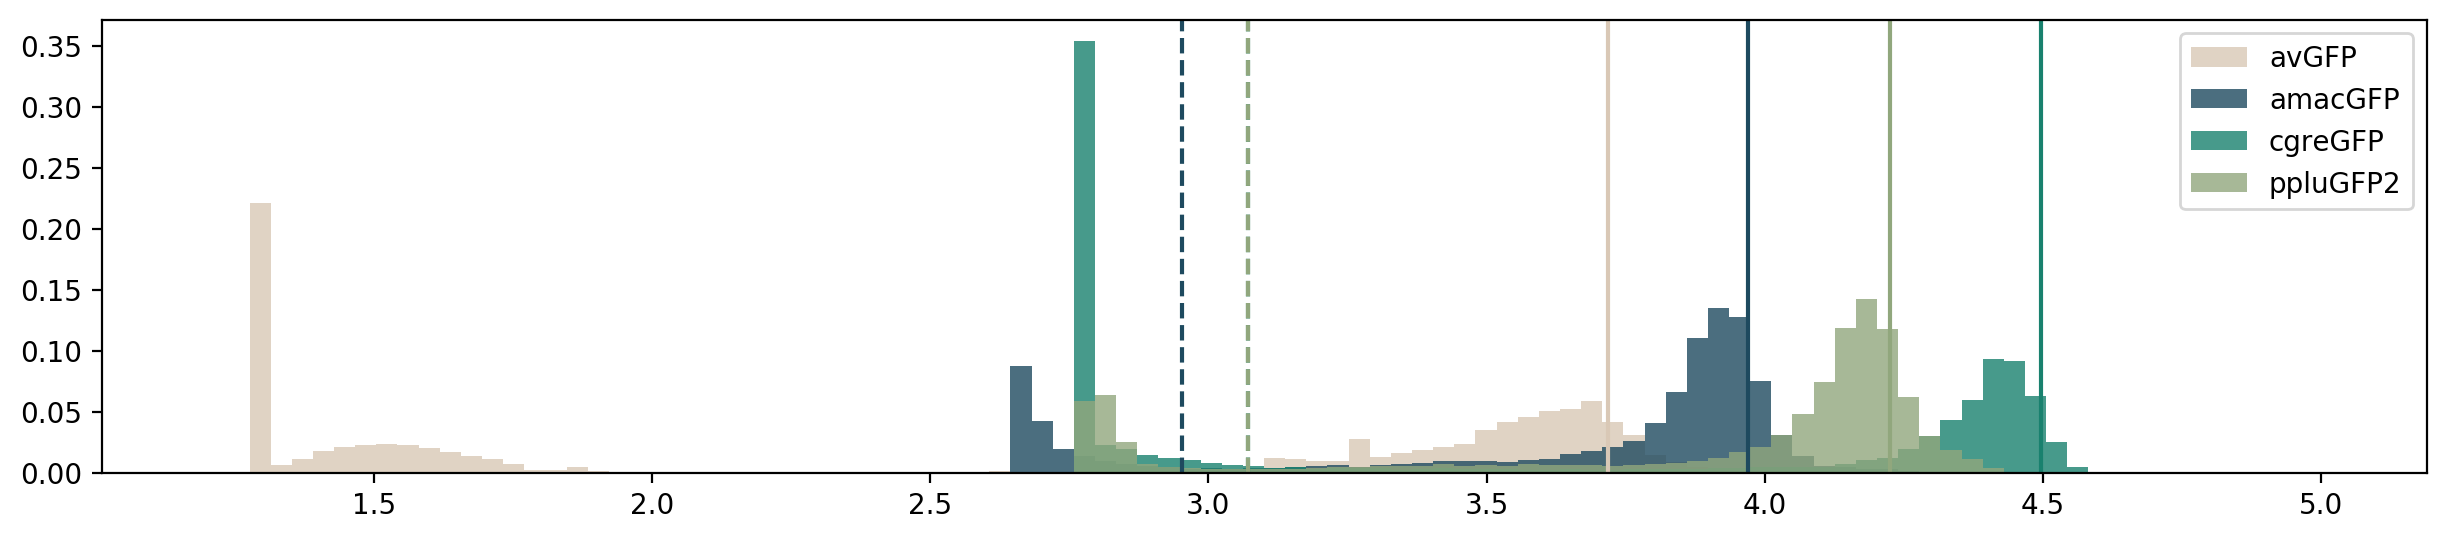

In [4]:
plt.figure(figsize=[15,3], dpi=200)
plot_multi_hist(data_aa, [av_mask, amac_mask, cgre_mask, pplu_mask], 'brightness', 
                ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP2'], r=(1.2,5),
               bins=100, colors=[colors['av'], colors['amac'], colors['cgre'], colors['pplu']], alpha=0.8)
for gene in ['avGFP','amacGFP', 'cgreGFP', 'ppluGFP']:
    plt.axvline(ref_wt_log[gene], color=colors[gene])
for gene in ['amac', 'cgre', 'pplu']:
    plt.axvline(gate_borders_log[gene][0], color=colors[gene], linestyle='--', )

# Number of genotypes

### Number of single mutants per position

In [5]:
def get_nmut_per_site(gene, mode='singles'):
#     sites = [0 for i in range(247)]
    sites = [0 if pseudopos_to_nativeaa[i][genekey[gene]]!='-' else np.nan for i in range(247)]
    if mode=='singles':
        muts = list(data_aa[eval(gene+'_mask')&singles_mask]['aa_genotype_pseudo'])
    else:
        muts = list(set((':'.join(data_aa[eval(gene+'_mask')&~wt_mask]['aa_genotype_pseudo'])).split(':')))
    for mut in muts:
        sites[int(mut[1:-1])] += 1
    return np.array(sites)

''

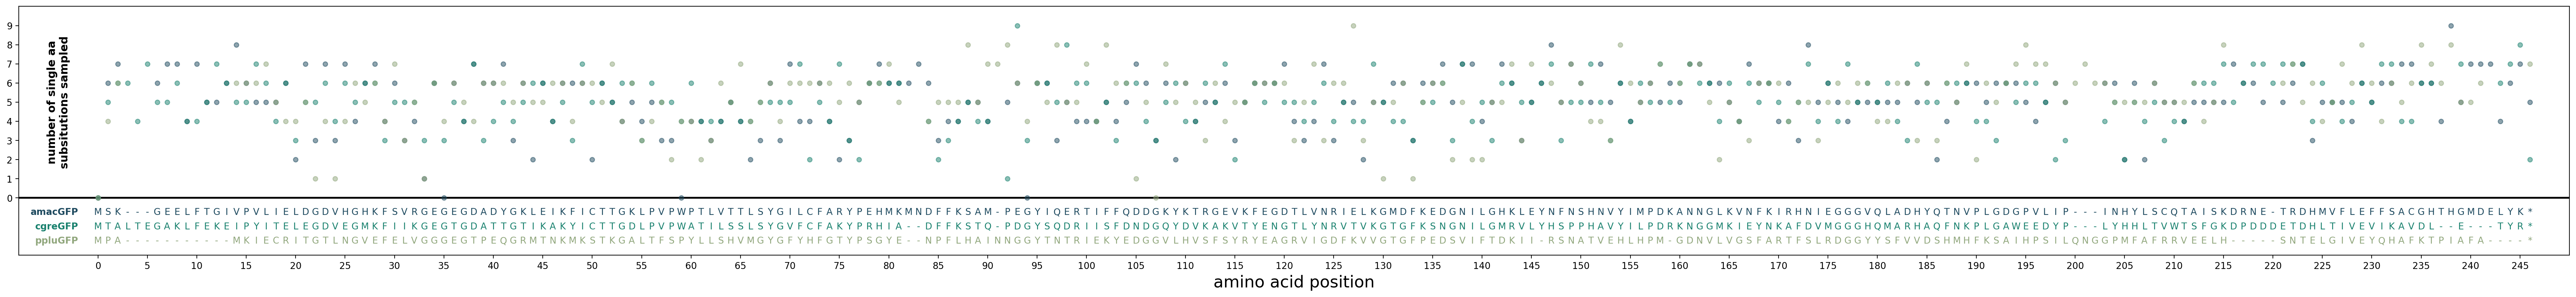

In [9]:
plt.figure(figsize=[50,5], dpi=200)
plt.axhline(y=0, color='k', linestyle='-', linewidth=2)

for gene in ['amac', 'cgre', 'pplu']:
    sites = get_nmut_per_site(gene, mode='singles')
    plt.plot(sites, linestyle='none', marker='o', ms=5, alpha=0.5,
             label=gene+'GFP', color=colors[gene])
    for i in range(247):
        plt.text(x=i, y=-0.75*genekey[gene], s=eval(gene+'_aligned')[i], color=colors[gene],
               verticalalignment='center', horizontalalignment='center', weight='normal',)
    plt.text(x=-2, y=-0.75*genekey[gene], s=gene+'GFP', color=colors[gene],
            verticalalignment='center', horizontalalignment='right', weight='semibold',)

plt.text(x=-4, y=5, s='number of single aa\nsubsitutions sampled', color='k', weight='semibold',
        verticalalignment='center', horizontalalignment='center', rotation=90, size='large')
plt.yticks(range(10), range(int(np.nanmax(sites))+1))
plt.xticks(range(0,250,5), range(0,250,5))
plt.ylim(-3,np.nanmax(sites)+1)
plt.xlim(-8,250)
label_plot_axis(x='amino acid position', fontsize_x=18, )
;

In [7]:
for gene in ['amac', 'cgre', 'pplu']:
    nmut = get_nmut_per_site(gene)
    print(gene+'GFP: average %s mutations per site (median: %s) present as single mutants' % (
        np.nanmean(nmut), np.nanmedian(nmut)))
    nmut = get_nmut_per_site(gene, mode='all')
    print(gene+'GFP: average %s mutations per site (median: %s), all\n' % (
        np.nanmean(nmut), np.nanmedian(nmut)))

amacGFP: average 5.083682008368201 mutations per site (median: 5.0) present as single mutants
amacGFP: average 11.523012552301255 mutations per site (median: 11.0), all

cgreGFP: average 5.033898305084746 mutations per site (median: 5.0) present as single mutants
cgreGFP: average 10.326271186440678 mutations per site (median: 10.0), all

ppluGFP: average 5.2152466367713 mutations per site (median: 5.0) present as single mutants
ppluGFP: average 9.52017937219731 mutations per site (median: 9.0), all



### Distribution of number of mutations per genotype (aa & nt)

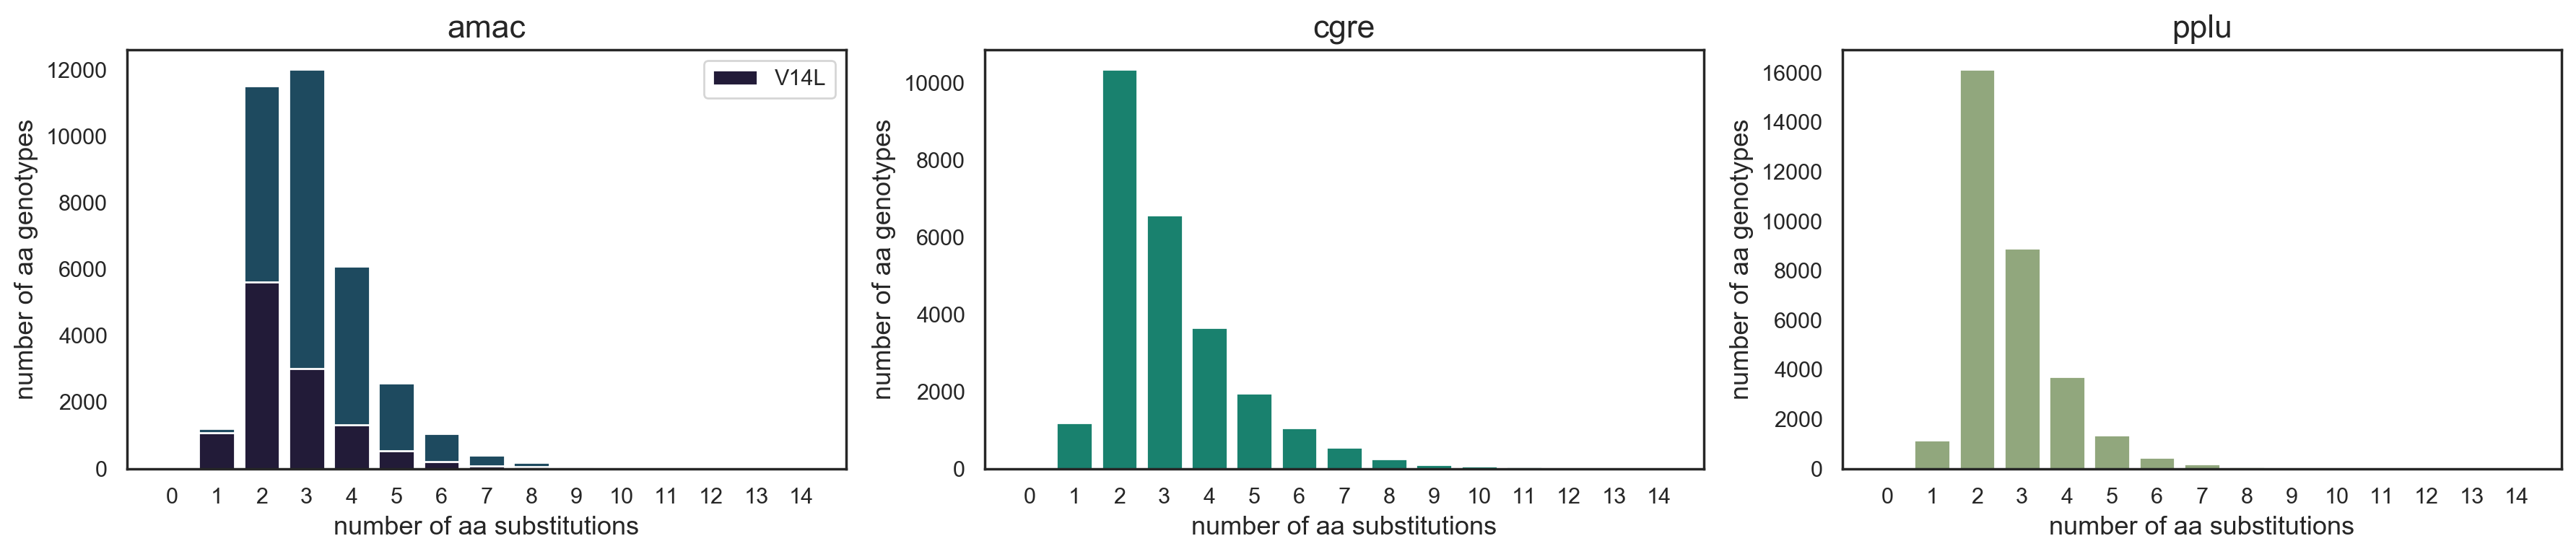

In [15]:
sns.set(style='white')
axes = subplots(width=6,nplots_per_row=3, nplots=3)
for gene,ax in zip(['amac', 'cgre', 'pplu'], axes):
    ngen = []
    v14l = []
    for n in range(0, 20):
        ngen.append(len(data_aa[eval(gene+'_mask') & (data_aa['n_mut']==n)]))
        if gene=='amac':
            v14l.append(len(data_aa[amacV14L_mask & (data_aa['n_mut']==n)]))
    plt.sca(ax)
    plt.bar(np.arange(len(ngen)), height=ngen,  color=colors[gene])
    if gene=='amac':
        plt.bar(np.arange(len(ngen)), height=v14l, color=colors['amacV14L'], alpha=1, label='V14L')
        plt.legend()
    plt.xticks(range(15), range(15))
    plt.xlim(-1, 15)
    label_plot_axis(t=gene, x='number of aa substitutions', y='number of aa genotypes')
#     plt.yscale('log')
plt.tight_layout()

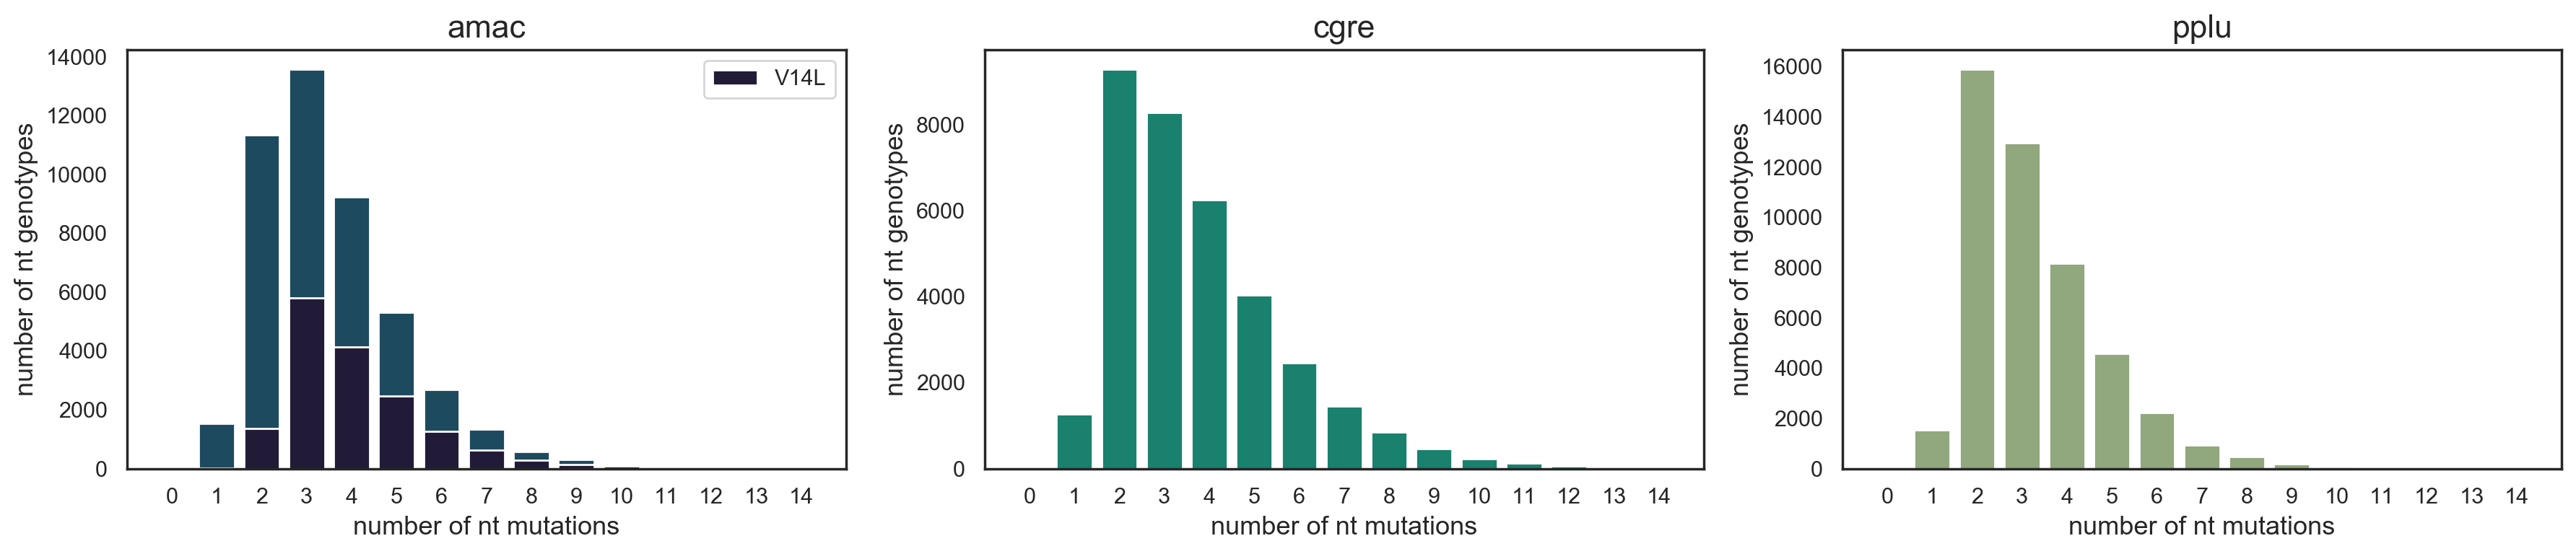

In [18]:
axes = subplots(width=6,nplots_per_row=3, nplots=3)
for gene,ax in zip(['amac', 'cgre', 'pplu'], axes):
    ngen = []
    v14l = []
    for n in range(0, 20):
        ngen.append(len(data_nt[eval(gene+'_mask_nt') & (data_nt['n_nt_mut']==n)]))
        if gene=='amac':
            v14l.append(len(data_nt[amacV14L_mask_nt & (data_nt['n_nt_mut']==n)]))
    plt.sca(ax)
    plt.bar(np.arange(len(ngen)), height=ngen,  color=colors[gene])
    if gene=='amac':
        plt.bar(np.arange(len(ngen)), height=v14l, color=colors['amacV14L'], alpha=1, label='V14L')
        plt.legend()
    plt.xticks(range(15), range(15))
    plt.xlim(-1,15)
    label_plot_axis(t=gene, x='number of nt mutations', y='number of nt genotypes')
#     plt.yscale('log')
plt.tight_layout()

# Mutation overlap between libraries

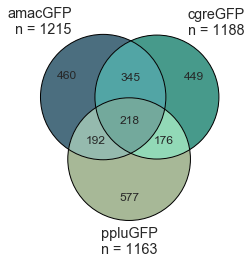

In [19]:
a = set([x[1:] for x in data_aa[amac_mask & singles_mask]['aa_genotype_pseudo']])
c = set([x[1:] for x in data_aa[cgre_mask & singles_mask]['aa_genotype_pseudo']])
p = set([x[1:] for x in data_aa[pplu_mask & singles_mask]['aa_genotype_pseudo']])

venn3(subsets=[a, c, p], set_labels=('amacGFP\nn = %s' % len(a), 
                                     'cgreGFP\nn = %s' % len(c), 'ppluGFP\nn = %s' % len(p)), 
      set_colors=(colors['amac'], colors['cgre'], colors['pplu']), alpha=0.8)
venn3_circles(subsets=[a, c, p], linewidth=1);

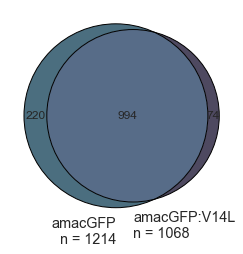

In [20]:
amV = set([x[1:] for x in data_aa[amacV14V_mask & singles_mask]['aa_genotype_pseudo']])
amL = set([x[1:] for x in data_aa[amacV14L_mask & singles_mask]['aa_genotype_pseudo']])

venn2(subsets=[amV, amL], set_labels=('amacGFP\nn = %s' % len(amV), 
                                     'amacGFP:V14L\nn = %s' % len(amL)), 
      set_colors=(colors['amac'], colors['amacV14L']), alpha=0.8)
venn2_circles(subsets=[amV, amL], linewidth=1);

# Control genotypes

In [3]:
chromomut_mask_nt = data_nt['aa_genotype_pseudo'].str.contains('|'.join(chromomuts['pseudopos']))

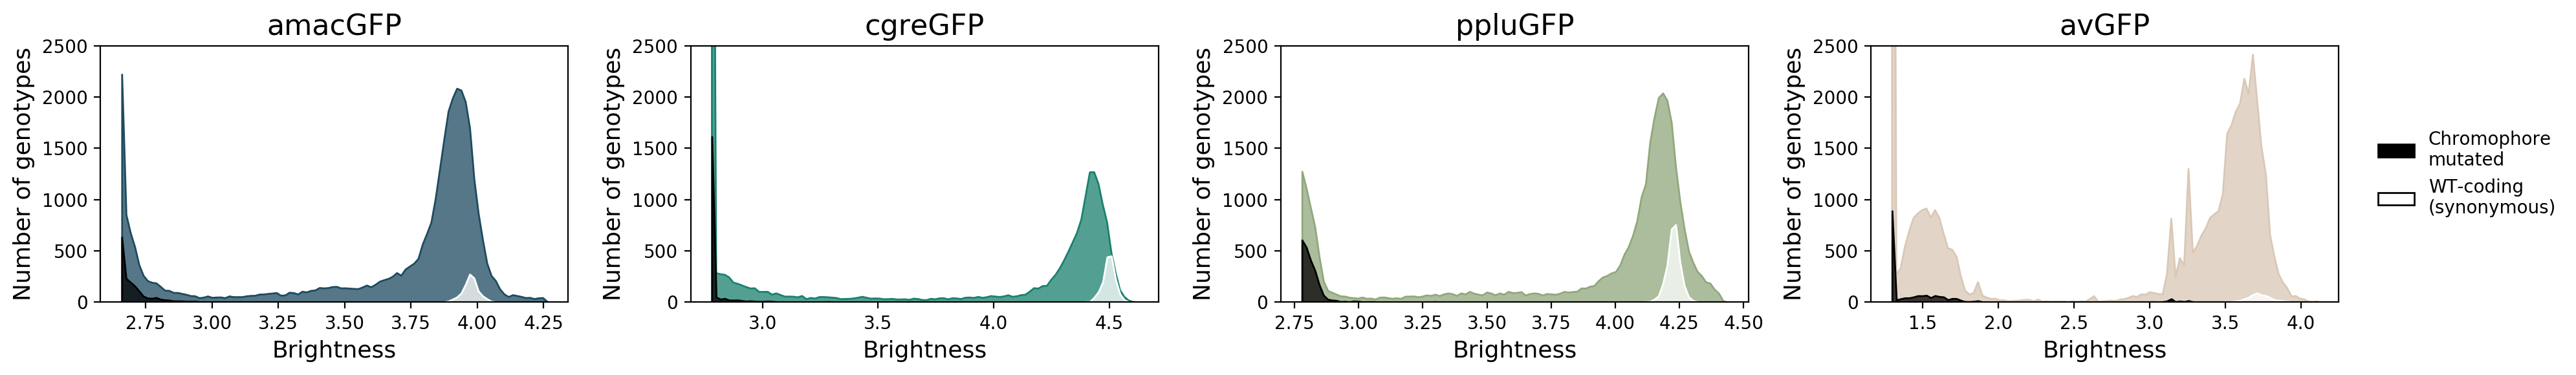

In [4]:
axes = subplots(nplots=4, nplots_per_row=4, width=5, height=3)

for gene,ax in zip(['amac', 'cgre', 'pplu', 'av'], axes):
    plt.sca(ax)
    minbin = data_aa[eval(gene+'_mask')]['brightness'].min()
    maxbin = data_aa[eval(gene+'_mask')]['brightness'].max()

    sns.histplot(data = data_aa[eval(gene+'_mask') & (data_aa.n_mut<10)]['brightness'],
                element = 'poly', bins=100, color=colors[gene], binrange=(minbin,maxbin))
    sns.histplot(data = data_aa[eval(gene+'_mask') & chromomut_mask & (data_aa.n_mut<10)]['brightness'],
                element = 'poly', bins=100, color='k', binrange=(minbin,maxbin))
    sns.histplot(data = data_nt[eval(gene+'_mask_nt') & wt_mask_nt]['log_brightness'],
                element = 'poly', bins=100, color='w', binrange=(minbin,maxbin))
    
    plt.ylim(0,2500)
    label_plot_axis(x = 'Brightness', y = 'Number of genotypes', t=gene+'GFP')
    
legendary(['k','w'], ['Chromophore\nmutated', 'WT-coding\n(synonymous)'], 
          bbox_to_anchor=(1.05, 0.5), loc='center left', edges=['k','k'])
    
plt.tight_layout()